In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!

# Review the DataFrame
# YOUR CODE HERE!


df_lending=pd.read_csv("Resources/lending_data.csv")
df_lending.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
# YOUR CODE HERE!]

# Separate the X variable, the features
# YOUR CODE HERE!

X=df_lending.drop('loan_status', axis=1)
y=df_lending['loan_status']

In [4]:
# Review the y variable Series
# YOUR CODE HERE!

y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
# YOUR CODE HERE!

X[:5]

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [7]:
# Check the balance of our target values
# YOUR CODE HERE!

y.value_counts(dropna=False)

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [10]:
df_lending.shape

(77536, 8)

In [12]:
df_lending.isnull().sum()

loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [13]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
# YOUR CODE HERE!

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y, test_size=0.2, random_state=1)

In [14]:
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape

((62028, 7), (62028,), (15508, 7), (15508,))

In [16]:
15508/77536

0.2000103177878663

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [17]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

lr_model=LogisticRegression(random_state=1)
# Fit the model using training data
# YOUR CODE HERE!

lr_model.fit(Xtrain, ytrain)

LogisticRegression(random_state=1)

In [18]:
Xtrain.columns

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt'],
      dtype='object')

In [ ]:
#z = 'loan_size'*w1+'interest_rate'*w2+'borrower_income'*w3+'debt_to_income'*w4+'num_of_accounts'*w5+ 'derogatory_marks'*w6+ 'total_debt'*w7+ a
#logistic(z)

In [19]:
#lr_model.coef_

array([[-1.07343332e-05, -1.11821247e-07, -3.86442644e-04,
        -2.57250652e-09,  1.61411871e-07,  5.41492664e-08,
         6.42898333e-04]])

In [20]:
#lr_model.intercept_

array([-3.43113659e-08])

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [22]:
# Make a prediction using the testing data
# YOUR CODE HERE!

ytest_pred=lr_model.predict(Xtest)
ytest_pred[:3]

array([0, 0, 0], dtype=int64)

In [23]:
lr_model.predict_proba(Xtest)

array([[9.81255353e-01, 1.87446466e-02],
       [9.98858793e-01, 1.14120719e-03],
       [9.96432384e-01, 3.56761569e-03],
       ...,
       [9.99769037e-01, 2.30962795e-04],
       [9.99330103e-01, 6.69896848e-04],
       [9.99791327e-01, 2.08673347e-04]])

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [27]:
from sklearn.metrics import balanced_accuracy_score,accuracy_score
# Print the balanced_accuracy score of the model
# YOUR CODE HERE!

balanced_accuracy_score(ytest, ytest_pred),accuracy_score(ytest, ytest_pred)

(0.9521352751368186, 0.9921975754449317)

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate a confusion matrix for the model
# YOUR CODE HERE!

confusion_matrix(ytest, ytest_pred)

array([[14926,    75],
       [   46,   461]], dtype=int64)

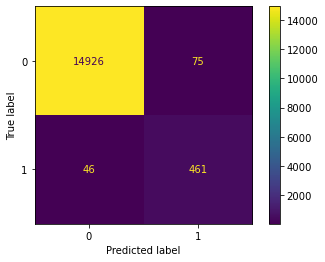

In [30]:
ConfusionMatrixDisplay.from_estimator(lr_model,Xtest,ytest)

In [32]:
from sklearn.metrics import classification_report
# Print the classification report for the model
# YOUR CODE HERE!

print(classification_report(ytest, ytest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15001
           1       0.86      0.91      0.88       507

    accuracy                           0.99     15508
   macro avg       0.93      0.95      0.94     15508
weighted avg       0.99      0.99      0.99     15508



### Step 4: Answer the following question.

In [38]:
# error rate:

error0 = 75/(14926+75)
error1 = 46/(46+461)  

print("error rate 0: {:0.2%}; error rate 1: {:0.2%}".format(error0, error1))

error rate 0: 0.50%; error rate 1: 9.07%


**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** As the error rate show above. It's doing good on predict on 0 but not 1. 
In this case this is not good because we want to identify all the high risk and reduce the faluse negtive, so the bank doesn't lose money.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [42]:
# Import the RandomOverSampler module form imbalanced-learn
# https://imbalanced-learn.org/stable/search.html?q=RandomOverSampler

from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

ros=RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
# YOUR CODE HERE!
Xtrain_res, ytrain_res = ros.fit_resample(Xtrain, ytrain)

In [ ]:
# Count the distinct values of the resampled labels data
# YOUR CODE HERE!

In [43]:
ytrain_res.value_counts()

loan_status
0    60035
1    60035
Name: count, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [44]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

lr_model_res=LogisticRegression(random_state=1)

# Fit the model using the resampled training data
# YOUR CODE HERE!
lr_model_res.fit(Xtrain_res, ytrain_res)

# Make a prediction using the testing data
# YOUR CODE HERE!

ytest_pred_res=lr_model_res.predict(Xtest)
ytest_pred_res[:3]

array([0, 0, 0], dtype=int64)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [46]:
# Print the balanced_accuracy score of the model 
# YOUR CODE HERE!
balanced_accuracy_score(ytest, ytest_pred_res)

0.9941749445500477

In [47]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!

confusion_matrix(ytest, ytest_pred_res)

array([[14915,    86],
       [    3,   504]], dtype=int64)

In [48]:
# Print the classification report for the model
# YOUR CODE HERE!

print(classification_report(ytest, ytest_pred_res))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.85      0.99      0.92       507

    accuracy                           0.99     15508
   macro avg       0.93      0.99      0.96     15508
weighted avg       1.00      0.99      0.99     15508



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** It's doing better as the accuracy rate show above. This give us lower number of faluse negtive that means less high-risk to be wrongly identified to healthy.